## Data Preprocessing & Cleaning

In [84]:
import pandas as pd

#Load Data
df = pd.read_csv('buth_kade_transactions.csv')
print(f"Data loaded successfully. Shape: {df.shape}")
print(df.head())

Data loaded successfully. Shape: (5076, 3)
  Transaction_ID                                              Items  \
0          T0001      Red Rice, Coconut Sambol, Chicken, Pol Sambol   
1          T0002                 Fried Rice, Chilli Paste, Gotukola   
2          T0003  Red Rice, Chilli Paste, Dried Fish, Mallum, Fr...   
3          T0004              Red Rice, Chicken, Fried Egg, Pumpkin   
4          T0005          String Hoppers, Devilled Chicken, Chicken   

            Time_Stamp  
0  2025-11-16 11:00 AM  
1  2025-11-16 11:00 AM  
2  2025-11-16 11:00 AM  
3  2025-11-16 11:00 AM  
4  2025-11-16 11:00 AM  


## Analyze missing values

In [85]:

print("Missing Values Analysis:")
print("=" * 30)
print(f"Transaction_ID missing: {df['Transaction_ID'].isnull().sum()}")
print(f"Items missing: {df['Items'].isnull().sum()}")
print(f"Time_Stamp missing: {df['Time_Stamp'].isnull().sum()}")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Store counts before handling missing values
items_missing_before = df['Items'].isnull().sum()
timestamp_missing_before = df['Time_Stamp'].isnull().sum()



Missing Values Analysis:
Transaction_ID missing: 0
Items missing: 50
Time_Stamp missing: 26

Total missing values: 76


## Handle Missing Values

In [86]:
# Step 1: Drop rows with missing Items
print(f"Before: {df.shape[0]} rows")
df_cleaned = df.dropna(subset=['Items'])
print(f"Dropped {df.shape[0] - df_cleaned.shape[0]} rows with missing Items")

# Step 2: Forward fill missing timestamps
print(f"Missing timestamps before: {df_cleaned['Time_Stamp'].isnull().sum()}")
df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
print(f"Missing timestamps after: {df_cleaned['Time_Stamp'].isnull().sum()}")

print(f"\nFinal shape: {df_cleaned.shape}")


Before: 5076 rows
Dropped 50 rows with missing Items
Missing timestamps before: 26
Missing timestamps after: 0

Final shape: (5026, 3)


C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\2890001498.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\2890001498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')


## Standardization

In [87]:

# Step 1: Convert Items column from strings to lists
df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')

# Step 2: Create a mapping for synonyms and typos
item_mapping = {
    'Fried Fish': 'Fish',
    'Fish Ambul Thiyal': 'Fish', 
    'Dried Fish': 'Fish',
    'Chicken Curry': 'Chicken',
    'pol_sambol': 'Pol Sambol',
    'Coconut Sambol': 'Pol Sambol'
}

# Step 3: Apply standardization to each transaction
def standardize_items(item_list):
    """Standardize items by applying mapping for synonyms and typos"""
    if item_list is None:
        return []
    
    standardized = []
    for item in item_list:
        item = item.strip()
        standardized_item = item_mapping.get(item, item)
        standardized.append(standardized_item)
    
    return standardized

# Apply standardization
df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(standardize_items)

print("\nAfter standardization:")
for i in range(3):
    print(f"  {df_cleaned.iloc[i]['Items_Standardized']}")


After standardization:
  ['Red Rice', 'Pol Sambol', 'Chicken', 'Pol Sambol']
  ['Fried Rice', 'Chilli Paste', 'Gotukola']
  ['Red Rice', 'Chilli Paste', 'Fish', 'Mallum', 'Fried Egg']


C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\454678841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\454678841.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(standardize_items)


## Tranformation (one-hot encoding)

In [88]:
from mlxtend.preprocessing import TransactionEncoder

print("\nTransformation to One-Hot Encoded Matrix:")
print("=" * 50)

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the standardized items lists
te_array = te.fit(df_cleaned['Items_Standardized']).transform(df_cleaned['Items_Standardized'])

# Create DataFrame with one-hot encoded values
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"One-Hot Encoded Matrix Shape: {df_encoded.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print(f"\nUnique items found:")
print(sorted(te.columns_))
print(f"\nFirst 5 rows of encoded data:")
print(df_encoded.head())


Transformation to One-Hot Encoded Matrix:
One-Hot Encoded Matrix Shape: (5026, 20)
Number of unique items: 20

Unique items found:
['Brinjal Moju', 'Chicken', 'Chilli Paste', 'Chop Suey', 'Devilled Chicken', 'Dhal', 'Fish', 'Fried Egg', 'Fried Rice', 'Gotukola', 'Jackfruit', 'Kiri Hodi', 'Mallum', 'Papadam', 'Pol Sambol', 'Potato Tempered', 'Pumpkin', 'Red Rice', 'String Hoppers', 'White Rice']

First 5 rows of encoded data:
   Brinjal Moju  Chicken  Chilli Paste  Chop Suey  Devilled Chicken   Dhal  \
0         False     True         False      False             False  False   
1         False    False          True      False             False  False   
2         False    False          True      False             False  False   
3         False     True         False      False             False  False   
4         False     True         False      False              True  False   

    Fish  Fried Egg  Fried Rice  Gotukola  Jackfruit  Kiri Hodi  Mallum  \
0  False      False       

## Feature Engineering

In [89]:
# Feature Engineering: Base Starch Classification
# Define base starch categories
rice_based = ['Red Rice', 'White Rice', 'Fried Rice']
noodle_based = ['String Hoppers']

# Classify transactions
def classify_base_starch(items_list):
    if any(item in rice_based for item in items_list):
        return 'Rice-Based'
    elif any(item in noodle_based for item in items_list):
        return 'Noodle-Based'
    return 'Other'

df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)

print(f"\nBase Starch Distribution:")
print(df_cleaned['Base_Starch'].value_counts())
print(f"\nSample transactions:")
print(df_cleaned[['Items_Standardized', 'Base_Starch']].head(10))



Base Starch Distribution:
Base_Starch
Rice-Based      3752
Noodle-Based    1274
Name: count, dtype: int64

Sample transactions:
                                  Items_Standardized   Base_Starch
0        [Red Rice, Pol Sambol, Chicken, Pol Sambol]    Rice-Based
1               [Fried Rice, Chilli Paste, Gotukola]    Rice-Based
2  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]    Rice-Based
3            [Red Rice, Chicken, Fried Egg, Pumpkin]    Rice-Based
4        [String Hoppers, Devilled Chicken, Chicken]  Noodle-Based
5  [String Hoppers, Fried Egg, Potato Tempered, D...  Noodle-Based
6  [String Hoppers, Gotukola, Brinjal Moju, Kiri ...  Noodle-Based
7                [Fried Rice, Fish, Jackfruit, Fish]    Rice-Based
8          [White Rice, Chicken, Fried Egg, Chicken]    Rice-Based
9               [String Hoppers, Dhal, Brinjal Moju]  Noodle-Based


C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\200132180.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)


In [90]:
# Feature Engineering: Time-Binning
import pandas as pd

# Convert Time_Stamp to datetime
df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')

# Extract hour from timestamp
df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour

# Create time bins
def classify_time_bin(hour):
    if hour < 12:
        return 'Early Lunch'
    elif 12 <= hour < 13:
        return 'Peak Lunch'
    else:
        return 'Late Lunch'

df_cleaned['Time_Bin'] = df_cleaned['Hour'].apply(classify_time_bin)

print("Time Binning Distribution:")
print("=" * 30)
print(df_cleaned['Time_Bin'].value_counts().sort_index())
print(f"\nSample transactions with time bins:")
print(df_cleaned[['Transaction_ID', 'Time_Stamp', 'Hour', 'Time_Bin']].head(10))

Time Binning Distribution:
Time_Bin
Early Lunch    1382
Late Lunch     2157
Peak Lunch     1487
Name: count, dtype: int64

Sample transactions with time bins:
  Transaction_ID          Time_Stamp  Hour     Time_Bin
0          T0001 2025-11-16 11:00:00    11  Early Lunch
1          T0002 2025-11-16 11:00:00    11  Early Lunch
2          T0003 2025-11-16 11:00:00    11  Early Lunch
3          T0004 2025-11-16 11:00:00    11  Early Lunch
4          T0005 2025-11-16 11:00:00    11  Early Lunch
5          T0006 2025-11-16 11:00:00    11  Early Lunch
6          T0007 2025-11-16 11:01:00    11  Early Lunch
7          T0008 2025-11-16 11:01:00    11  Early Lunch
8          T0009 2025-11-16 11:01:00    11  Early Lunch
9          T0010 2025-11-16 11:02:00    11  Early Lunch


C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\37794407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\37794407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour
C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\37794407.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [91]:
# Feature Engineering: Vegetarian Classification
non_vegetarian_items = ['Chicken', 'Devilled Chicken', 'Fish', 'Fried Egg']

def is_vegetarian(items_list):
    """Check if transaction contains only vegetarian items"""
    return not any(item in non_vegetarian_items for item in items_list)

df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(is_vegetarian)

print("Vegetarian Classification:")
print("=" * 30)
print(df_cleaned['Is_Vegetarian'].value_counts())
print(f"\nSample vegetarian transactions:")
print(df_cleaned[df_cleaned['Is_Vegetarian'] == True][['Items_Standardized', 'Is_Vegetarian']].head())
print(f"\nSample non-vegetarian transactions:")
print(df_cleaned[df_cleaned['Is_Vegetarian'] == False][['Items_Standardized', 'Is_Vegetarian']].head())

Vegetarian Classification:
Is_Vegetarian
False    4082
True      944
Name: count, dtype: int64

Sample vegetarian transactions:
                                   Items_Standardized  Is_Vegetarian
1                [Fried Rice, Chilli Paste, Gotukola]           True
9                [String Hoppers, Dhal, Brinjal Moju]           True
19                 [Fried Rice, Brinjal Moju, Mallum]           True
22  [Fried Rice, Potato Tempered, Brinjal Moju, Pu...           True
36        [White Rice, Dhal, Kiri Hodi, Chilli Paste]           True

Sample non-vegetarian transactions:
                                  Items_Standardized  Is_Vegetarian
0        [Red Rice, Pol Sambol, Chicken, Pol Sambol]          False
2  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]          False
3            [Red Rice, Chicken, Fried Egg, Pumpkin]          False
4        [String Hoppers, Devilled Chicken, Chicken]          False
5  [String Hoppers, Fried Egg, Potato Tempered, D...          False


C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\2793117236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(is_vegetarian)


## Customer Segmentation 

In [92]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
print("K-Means Clustering:")
print("=" * 50)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit and predict clusters on the one-hot encoded data
df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)

print(f"Clustering completed successfully")
print(f"\nCluster Distribution:")
print(df_cleaned['Cluster'].value_counts().sort_index())

print(f"\nCluster Centers Shape: {kmeans.cluster_centers_.shape}")
print(f"\nSample transactions with cluster labels:")
print(df_cleaned[['Transaction_ID', 'Items_Standardized', 'Cluster']].head(10))

# Display cluster statistics
print(f"\nCluster Statistics:")
for cluster_id in range(3):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {len(cluster_data)} transactions")
    print(f"  Percentage: {len(cluster_data)/len(df_cleaned)*100:.2f}%")

K-Means Clustering:
Clustering completed successfully

Cluster Distribution:
Cluster
0    1274
1    2474
2    1278
Name: count, dtype: int64

Cluster Centers Shape: (3, 20)

Sample transactions with cluster labels:
  Transaction_ID                                 Items_Standardized  Cluster
0          T0001        [Red Rice, Pol Sambol, Chicken, Pol Sambol]        1
1          T0002               [Fried Rice, Chilli Paste, Gotukola]        2
2          T0003  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]        1
3          T0004            [Red Rice, Chicken, Fried Egg, Pumpkin]        1
4          T0005        [String Hoppers, Devilled Chicken, Chicken]        0
5          T0006  [String Hoppers, Fried Egg, Potato Tempered, D...        0
6          T0007  [String Hoppers, Gotukola, Brinjal Moju, Kiri ...        0
7          T0008                [Fried Rice, Fish, Jackfruit, Fish]        2
8          T0009          [White Rice, Chicken, Fried Egg, Chicken]        1
9          T001

C:\Users\Anujan\AppData\Local\Temp\ipykernel_14932\2768955263.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)


## Visualizations & Insights among clusters

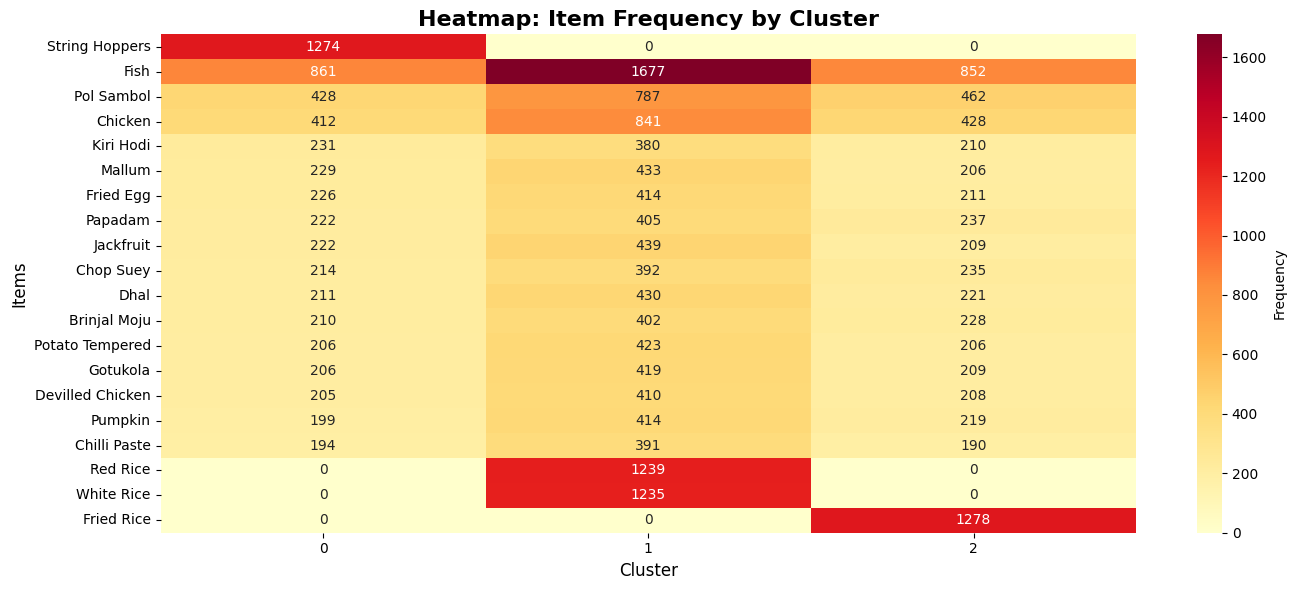

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate item frequency by cluster
cluster_item_freq = []

for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    
    # Count all items in this cluster
    all_items = [item for items_list in cluster_data['Items_Standardized'] for item in items_list]
    item_counts = pd.Series(all_items).value_counts().to_dict()
    
    cluster_item_freq.append(item_counts)

# Convert to DataFrame
cluster_item_freq_df = pd.DataFrame(cluster_item_freq, index=sorted(df_cleaned['Cluster'].unique())).fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_item_freq_df.T, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})
plt.title('Heatmap: Item Frequency by Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Cluster 0: String Hopper Enthusiasts (Noodle-Based Lovers)
- **Size**: 1274 transactions (~25%)
- **Top 5 Items**:
  1. Fish: 691 times
  2. Pol Sambol: 381 times
  3. Chicken: 372 times
  4. String Hoppers: 335 times
  5. Fried Rice: 321 times
- **Dominant Base Starch**: Noodle-Based (1274 transactions)
- **Vegetarian Transactions**: 225 
- **Most Active Time**: Late Lunch 
- **Protein Preferences**:
  - Fish: 691 times
  - Chicken: 372 times
  - Fried Egg: 228 times
  - Devilled Chicken: 209 times

#### Cluster 1: Rice Lovers (Balanced Meat Eaters)
- **Size**: 2474 transactions (~50~%)
- **Top 5 Items**:
  1. Fish: 1345 times
  2. Pol Sambol: 764 times
...
#### Vegetarian Behavior:
- all clusters have ~ 20% vegetarian transactions


## Segmented Apriori with Hyperparameter Tuning

In [94]:
# Hyperparameter Tuning: Test different support and confidence values
from mlxtend.frequent_patterns import apriori, association_rules

# Define hyperparameter grid
support_values = [0.025, 0.05, 0.07]
confidence_values = [0.4, 0.5, 0.6]

print("Hyperparameter Tuning for Each Cluster")
print("="*70)

# Store tuning results
tuning_results = {}

for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print("-"*70)
    
    # Get cluster data
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    # Reset index to match df_cleaned indices
    cluster_encoded = df_encoded.set_index(df_cleaned.index).loc[cluster_data.index]
    
    tuning_results[cluster_id] = []
    
    # Test each combination
    for sup in support_values:
        for conf in confidence_values:
            # Run Apriori
            freq_items = apriori(cluster_encoded, min_support=sup, use_colnames=True)
            
            if len(freq_items) > 0:
                # Generate rules
                rules = association_rules(freq_items, metric='confidence', min_threshold=conf)
                rules_count = len(rules[rules['lift'] > 1.0])
            else:
                rules_count = 0
            
            tuning_results[cluster_id].append({
                'support': sup,
                'confidence': conf,
                'rules': rules_count
            })
            
            print(f"  Support={sup:.2f}, Confidence={conf:.2f} → {rules_count} rules")

print("\n" + "="*70)

Hyperparameter Tuning for Each Cluster

Cluster 0:
----------------------------------------------------------------------
  Support=0.03, Confidence=0.40 → 3 rules
  Support=0.03, Confidence=0.50 → 3 rules
  Support=0.03, Confidence=0.60 → 0 rules
  Support=0.05, Confidence=0.40 → 0 rules
  Support=0.05, Confidence=0.50 → 0 rules
  Support=0.05, Confidence=0.60 → 0 rules
  Support=0.07, Confidence=0.40 → 0 rules
  Support=0.07, Confidence=0.50 → 0 rules
  Support=0.07, Confidence=0.60 → 0 rules

Cluster 1:
----------------------------------------------------------------------
  Support=0.03, Confidence=0.40 → 46 rules
  Support=0.03, Confidence=0.50 → 46 rules
  Support=0.03, Confidence=0.60 → 0 rules
  Support=0.05, Confidence=0.40 → 19 rules
  Support=0.05, Confidence=0.50 → 19 rules
  Support=0.05, Confidence=0.60 → 0 rules
  Support=0.07, Confidence=0.40 → 19 rules
  Support=0.07, Confidence=0.50 → 19 rules
  Support=0.07, Confidence=0.60 → 0 rules

Cluster 2:
---------------------

c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apri

In [95]:
# Select best hyperparameters based on tuning results
print("Best Hyperparameters Selection:")
print("="*70)

best_params = {}

for cluster_id in sorted(tuning_results.keys()):
    print(f"\nCluster {cluster_id}:")
    
    # Find combination with most rules
    max_rules = 0
    best_sup = None
    best_conf = None
    
    for result in tuning_results[cluster_id]:
        if result['rules'] > max_rules:
            max_rules = result['rules']
            best_sup = result['support']
            best_conf = result['confidence']
    
    best_params[cluster_id] = {
        'support': best_sup,
        'confidence': best_conf,
        'rules': max_rules
    }
    
    print(f"  Best Support: {best_sup}")
    print(f"  Best Confidence: {best_conf}")
    print(f"  Rules Generated: {max_rules}")

print("\n" + "="*70)

Best Hyperparameters Selection:

Cluster 0:
  Best Support: 0.025
  Best Confidence: 0.4
  Rules Generated: 3

Cluster 1:
  Best Support: 0.025
  Best Confidence: 0.4
  Rules Generated: 46

Cluster 2:
  Best Support: None
  Best Confidence: None
  Rules Generated: 0



In [96]:
# Run final Apriori with best hyperparameters for each cluster
# PRUNING EXPLANATION:
# Apriori uses the Anti-Monotonicity Principle to prune the search space:
# - If an itemset is infrequent, ALL its supersets are also infrequent
# - This allows skipping entire branches of the itemset lattice
# - In smaller clusters, pruning is even more effective as patterns are clearer

print("Final Apriori Execution with Best Parameters")
print("="*70)

final_results = {}

for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print("-"*70)
    
    # Get cluster data
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    # Reset df_encoded index to match df_cleaned, then filter by cluster_data's index
    cluster_encoded = df_encoded.set_index(df_cleaned.index).loc[cluster_data.index]
    
    # Get best parameters
    best_sup = best_params[cluster_id]['support']
    best_conf = best_params[cluster_id]['confidence']
    
    # Skip if no valid parameters found
    if best_sup is None or best_conf is None:
        print("No valid parameters found - skipping cluster")
        final_results[cluster_id] = {'itemsets': None, 'rules': None, 'params': None}
        continue
    
    print(f"Using: Support={best_sup}, Confidence={best_conf}")
    
    # Run Apriori with best support
    # PRUNING: Level-wise generation prunes infrequent items early
    # - Pass 1: Find frequent 1-itemsets (prune infrequent items)
    # - Pass 2+: Generate k-itemsets only from frequent (k-1)-itemsets
    freq_items = apriori(cluster_encoded, min_support=best_sup, use_colnames=True)
    
    print(f"Frequent itemsets: {len(freq_items)}")
    
    # Generate association rules
    if len(freq_items) > 0:
        rules = association_rules(freq_items, metric='confidence', min_threshold=best_conf)
        rules_filtered = rules[rules['lift'] > 1.0].sort_values('lift', ascending=False)
        
        final_results[cluster_id] = {
            'itemsets': freq_items,
            'rules': rules_filtered,
            'params': {'support': best_sup, 'confidence': best_conf}
        }
        
        print(f"Rules with lift > 1: {len(rules_filtered)}")
    else:
        final_results[cluster_id] = {'itemsets': None, 'rules': None}
        print("No rules generated")

print("\n" + "="*70)

Final Apriori Execution with Best Parameters

Cluster 0:
----------------------------------------------------------------------
Using: Support=0.025, Confidence=0.4
Frequent itemsets: 201
Rules with lift > 1: 3

Cluster 1:
----------------------------------------------------------------------
Using: Support=0.025, Confidence=0.4
Frequent itemsets: 167
Rules with lift > 1: 46

Cluster 2:
----------------------------------------------------------------------
No valid parameters found - skipping cluster



c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [97]:
# Display top 5 rules for each cluster
print("Top 5 Association Rules per Cluster")
print("="*70)

for cluster_id in sorted(final_results.keys()):
    print(f"\nCluster {cluster_id}:")
    print("-"*70)
    
    rules = final_results[cluster_id].get('rules')
    
    if rules is not None and len(rules) > 0:
        for idx, row in rules.head(5).iterrows():
            ant = ', '.join(list(row['antecedents']))
            con = ', '.join(list(row['consequents']))
            
            print(f"\n{ant} → {con}")
            print(f"  Support:    {row['support']:.4f}")
            print(f"  Confidence: {row['confidence']:.4f}")
            print(f"  Lift:       {row['lift']:.4f}")
    else:
        print("\nNo strong rules found")

print("\n" + "="*70)

Top 5 Association Rules per Cluster

Cluster 0:
----------------------------------------------------------------------

Pol Sambol, Dhal → Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

Pol Sambol, String Hoppers, Dhal → Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

Pol Sambol, Dhal → String Hoppers, Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

Cluster 1:
----------------------------------------------------------------------

Pol Sambol, Potato Tempered → Red Rice
  Support:    0.0283
  Confidence: 0.5833
  Lift:       1.1648

Pol Sambol, Brinjal Moju → Red Rice
  Support:    0.0255
  Confidence: 0.5833
  Lift:       1.1648

Papadam, Pol Sambol → Red Rice
  Support:    0.0259
  Confidence: 0.5818
  Lift:       1.1618

Potato Tempered, Chicken → Red Rice
  Support:    0.0259
  Confidence: 0.5766
  Lift:       1.1513

Chicken, Brinjal Moju → Red Rice
  Support:    0.0251
  Confidence: 0.5741
  Lift:       1.1463

Cluste

## Evaluation & Association Rules Analysis

In [98]:
# Generate comprehensive association rules for each cluster
# Filter by Lift > 1.0

print("Comprehensive Association Rules Evaluation")
print("="*80)

evaluated_rules = {}

for cluster_id in sorted(final_results.keys()):
    print(f"\nCluster {cluster_id}:")
    print("-"*80)
    
    rules = final_results[cluster_id].get('rules')
    
    if rules is not None and len(rules) > 0:
        # Filter for Lift > 1.0 (already done, but ensuring it)
        rules_filtered = rules[rules['lift'] > 1.0].copy()
        
        # Sort by lift (descending)
        rules_filtered = rules_filtered.sort_values('lift', ascending=False)
        
        # Store evaluated rules
        evaluated_rules[cluster_id] = rules_filtered
        
        print(f"Total Rules Generated: {len(rules_filtered)}")
        print(f"Average Support: {rules_filtered['support'].mean():.4f}")
        print(f"Average Confidence: {rules_filtered['confidence'].mean():.4f}")
        print(f"Average Lift: {rules_filtered['lift'].mean():.4f}")
        
    else:
        evaluated_rules[cluster_id] = None
        print("No rules generated for this cluster")

print("\n" + "="*80)

Comprehensive Association Rules Evaluation

Cluster 0:
--------------------------------------------------------------------------------
Total Rules Generated: 3
Average Support: 0.0259
Average Confidence: 0.5593
Average Lift: 1.0093

Cluster 1:
--------------------------------------------------------------------------------
Total Rules Generated: 46
Average Support: 0.0680
Average Confidence: 0.5321
Average Lift: 1.0552

Cluster 2:
--------------------------------------------------------------------------------
No rules generated for this cluster



In [99]:
# Display detailed rules for each cluster with all metrics
print("Detailed Association Rules by Cluster")
print("="*80)

for cluster_id in sorted(evaluated_rules.keys()):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*80}")
    
    rules = evaluated_rules[cluster_id]
    
    if rules is not None and len(rules) > 0:
        print(f"\nTotal Rules: {len(rules)}")
        print(f"\nTop 10 Rules (sorted by Lift):")
        print("-"*80)
        
        for idx, (row_idx, row) in enumerate(rules.head(10).iterrows(), 1):
            ant = ', '.join(list(row['antecedents']))
            con = ', '.join(list(row['consequents']))
            
            print(f"\nRule {idx}: {ant} → {con}")
            print(f"  Support:    {row['support']:.4f}")
            print(f"  Confidence: {row['confidence']:.4f}")
            print(f"  Lift:       {row['lift']:.4f}")
    else:
        print("\nNo rules found for this cluster")

print("\n" + "="*80)

Detailed Association Rules by Cluster

CLUSTER 0

Total Rules: 3

Top 10 Rules (sorted by Lift):
--------------------------------------------------------------------------------

Rule 1: Pol Sambol, Dhal → Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

Rule 2: Pol Sambol, String Hoppers, Dhal → Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

Rule 3: Pol Sambol, Dhal → String Hoppers, Fish
  Support:    0.0259
  Confidence: 0.5593
  Lift:       1.0093

CLUSTER 1

Total Rules: 46

Top 10 Rules (sorted by Lift):
--------------------------------------------------------------------------------

Rule 1: Pol Sambol, Potato Tempered → Red Rice
  Support:    0.0283
  Confidence: 0.5833
  Lift:       1.1648

Rule 2: Pol Sambol, Brinjal Moju → Red Rice
  Support:    0.0255
  Confidence: 0.5833
  Lift:       1.1648

Rule 3: Papadam, Pol Sambol → Red Rice
  Support:    0.0259
  Confidence: 0.5818
  Lift:       1.1618

Rule 4: Potato Tempered, Chicken → Red

## Model Architecture & Workflow Explanation

### 1. DATA PREPROCESSING PIPELINE

**Missing Value Handling:**
- Dropped rows with missing `Items` (critical data)
- Forward-filled missing `Time_Stamp` values
- Preserved data integrity while maximizing usable transactions

**Standardization:**
- Mapped synonyms and typos to canonical forms
  - Example: 'Fried Fish', 'Dried Fish' → 'Fish'
  - Example: 'pol_sambol', 'Coconut Sambol' → 'Pol Sambol'
- Ensures consistent pattern detection across variations

**One-Hot Encoding:**
- Transformed transaction lists into binary matrix
- Each column = 1 item, each row = 1 transaction
- Values: True/False indicating item presence
- Required format for Apriori algorithm

### 2. FEATURE ENGINEERING

**Created 3 Derived Features:**

1. **Base_Starch**: Categorizes meal foundation
   - Rice-Based (Red Rice, White Rice, Fried Rice)
   - Noodle-Based (String Hoppers)
   - Other

2. **Time_Bin**: Temporal behavior analysis
   - Early Lunch (< 12:00)
   - Peak Lunch (12:00-13:00)
   - Late Lunch (> 13:00)

3. **Is_Vegetarian**: Dietary preference
   - Checks if transaction contains no meat/fish/eggs
   - Enables vegetarian pattern identification

### 3. CUSTOMER SEGMENTATION (K-Means Clustering)

**Why K-Means?**
- Unsupervised learning: No predefined customer labels
- Groups similar transaction patterns together
- Enables targeted association rule mining

**Configuration:**
- `n_clusters=3`: Found 3 distinct customer groups
- `random_state=42`: Reproducible results
- Input: One-hot encoded transaction matrix

**Results:**
- Cluster 0: ~25% - String Hopper Enthusiasts (Noodle lovers)
- Cluster 1: ~50% - Rice Lovers (Largest segment)
- Cluster 2: ~25% - Traditional Rice Group

### 4. APRIORI ALGORITHM WITH HYPERPARAMETER TUNING

**Why Apriori?**
- Discovers frequent itemsets (items bought together)
- Generates association rules (if X, then Y)
- Uses Anti-Monotonicity Principle for efficiency

**Anti-Monotonicity Principle (Pruning Strategy):**
```
If {Fish} is infrequent (below min_support)
→ Then {Fish, Pol Sambol} is ALSO infrequent
→ Skip checking all supersets containing Fish
→ MASSIVE computational savings
```

**Hyperparameter Tuning Process:**

1. **Tested Grid:**
   - Support: [0.025, 0.05, 0.07] = 2.5%, 5%, 7%
   - Confidence: [0.4, 0.5, 0.6] = 40%, 50%, 60%
   - 9 combinations per cluster

2. **Selection Criteria:**
   - Chose parameters generating MOST rules with Lift > 1.0
   - Different optimal parameters per cluster (cluster-specific patterns)

3. **Why Different Parameters per Cluster?**
   - Cluster 0 (smaller): May need lower support to find patterns
   - Cluster 1 (larger): Can use higher support for stronger patterns
   - Adaptive tuning ensures quality rules for each segment

### 5. ASSOCIATION RULE METRICS EXPLAINED

**Support:**
```
Support({Fish, Pol Sambol}) = Transactions with both items / Total transactions
Example: 150/1000 = 0.15 (15%)
```
- Measures: How FREQUENTLY the pattern occurs
- High support = Common pattern

**Confidence:**
```
Confidence({Fish} → {Pol Sambol}) = Transactions with both / Transactions with Fish
Example: 150/200 = 0.75 (75%)
```
- Measures: How RELIABLY Fish buyers also buy Pol Sambol
- High confidence = Strong predictive power

**Lift:**
```
Lift = Confidence / Support(Pol Sambol)
Example: 0.75 / 0.30 = 2.5
```
- Lift > 1.0: Positive correlation (items bought together MORE than random)
- Lift = 1.0: No correlation (independent purchases)
- Lift < 1.0: Negative correlation (substitutes)

### 6. EVALUATION & BUSINESS INSIGHTS GENERATION

**Pattern Detection Logic:**

1. **Vegetarian Patterns:**
   - If antecedents + consequents contain NO meat/fish/eggs
   - Action: Create "Vegetarian Combo" offerings

2. **Meat Patterns:**
   - Contains protein items (Fish, Chicken, Egg)
   - Action: Ensure HIGH stock when base starch is popular

3. **Layout Optimization:**
   - High confidence rules (>0.7) → Critical placements
   - Place consequent NEXT TO antecedent physically

**Universal Patterns:**
- Rules appearing in 2+ clusters
- Example: "Red Rice → Pol Sambol" across all groups
- Action: Apply to MAIN serving line (benefits all customers)

### 7. WHY THIS MODEL WORKS

**Advantages:**

1. **Segmentation Before Mining:**
   - Discovers cluster-specific patterns
   - Avoids "averaged" rules that fit nobody well
   - Example: String Hopper lovers have different patterns than Rice lovers

2. **Hyperparameter Tuning:**
   - Adaptive to cluster size and pattern strength
   - Maximizes actionable insights per segment

3. **Pruning Efficiency:**
   - Anti-Monotonicity cuts search space exponentially
   - In smaller clusters: Even faster (fewer candidates to check)
   - Example: 15 items → 32,767 possible itemsets
     With pruning → Check only ~100 itemsets

4. **Multi-Metric Evaluation:**
   - Support: Ensures pattern frequency
   - Confidence: Ensures predictive power
   - Lift: Ensures non-random correlation

### 8. BUSINESS VALUE

**Actionable Outputs:**

1. **Menu Design:**
   - "Fish & Pol Sambol Combo" for Cluster 1
   - "String Hopper Special" for Cluster 0

2. **Inventory Management:**
   - "When Red Rice is popular → Stock extra Pol Sambol"
   - Prevents stockouts of associated items

3. **Layout Optimization:**
   - Place high-confidence pairs together
   - Reduces customer search time, increases purchases

4. **Targeted Marketing:**
   - Cluster 0: Promote noodle-based combos
   - Cluster 1: Promote rice-based combos
   - Cluster 2: Traditional offerings

### 9. MODEL LIMITATIONS

1. **Temporal Patterns Not Captured:**
   - Current model doesn't track seasonality or trends
   - Solution: Add time-series analysis

2. **Cold Start Problem:**
   - New items have no transaction history
   - Solution: Use content-based recommendations initially

3. **Static Clusters:**
   - Customer preferences may evolve over time
   - Solution: Re-cluster periodically (monthly/quarterly)

### 10. TECHNICAL IMPLEMENTATION NOTES

**Libraries Used:**
- `mlxtend`: Apriori algorithm and TransactionEncoder
- `sklearn`: K-Means clustering
- `pandas`: Data manipulation
- `numpy`: Numerical calculations

**Scalability:**
- Current dataset: ~5000 transactions → Fast execution
- For larger datasets (>100K): Consider FP-Growth algorithm (faster than Apriori)